## Antoine CHIAUSA 4A INFO FISA

---

# PHASE 1 : Exploration et base SQLite

## Exploration de la base

#### Chargement des CSV avec pandas

Lecture des fichiers CSV

In [14]:
import pandas as pd
import sqlite3

con = sqlite3.connect("imdb_test.db")

#Lecture des fichiers CSV
characters = pd.read_csv("characters.csv", low_memory=False)
directors = pd.read_csv("directors.csv", low_memory=False)
genres = pd.read_csv("genres.csv", low_memory=False)
knownformovies = pd.read_csv("knownformovies.csv", low_memory=False)
movies = pd.read_csv("movies.csv", low_memory=False)
persons = pd.read_csv("persons.csv", low_memory=False)
principals = pd.read_csv("principals.csv", low_memory=False)
professions = pd.read_csv("professions.csv", low_memory=False)
ratings = pd.read_csv("ratings.csv", low_memory=False)
titles = pd.read_csv("titles.csv", low_memory=False)
writers = pd.read_csv("writers.csv", low_memory=False)

### Statistiques descriptives

In [15]:
dataframes = {
    "characters": characters,
    "directors": directors,
    "genres": genres,
    "knownformovies": knownformovies,
    "movies": movies,
    "persons": persons,
    "professions": professions,
    "ratings": ratings,
    "titles": titles,
    "writers": writers
}

Nombre de lignes et de colonnes

In [16]:
for f in dataframes :
    rows, columns = dataframes[f].shape
    print(f"La table {f} contient {rows} lignes et {columns} colonnes")

La table characters contient 1405274 lignes et 3 colonnes
La table directors contient 419861 lignes et 2 colonnes
La table genres contient 649379 lignes et 2 colonnes
La table knownformovies contient 1328773 lignes et 2 colonnes
La table movies contient 291238 lignes et 8 colonnes
La table persons contient 632324 lignes et 4 colonnes
La table professions contient 1231760 lignes et 2 colonnes
La table ratings contient 291238 lignes et 3 colonnes
La table titles contient 1908072 lignes et 8 colonnes
La table writers contient 900485 lignes et 2 colonnes


Types de données

In [17]:
for f in dataframes :
    print("Types de données pour la table", f)
    print(dataframes[f].dtypes)
    print("\n")

Types de données pour la table characters
('mid',)     object
('pid',)     object
('name',)    object
dtype: object


Types de données pour la table directors
('mid',)    object
('pid',)    object
dtype: object


Types de données pour la table genres
('mid',)      object
('genre',)    object
dtype: object


Types de données pour la table knownformovies
('pid',)    object
('mid',)    object
dtype: object


Types de données pour la table movies
('mid',)                object
('titleType',)          object
('primaryTitle',)       object
('originalTitle',)      object
('isAdult',)             int64
('startYear',)           int64
('endYear',)           float64
('runtimeMinutes',)    float64
dtype: object


Types de données pour la table persons
('pid',)             object
('primaryName',)     object
('birthYear',)      float64
('deathYear',)      float64
dtype: object


Types de données pour la table professions
('pid',)        object
('jobName',)    object
dtype: object


Types de données 

Valeurs manquantes (NaN, chaînes vides)

In [18]:
for f in dataframes:
    print(f"Valeurs manquantes dans la table {f} :")
    print(dataframes[f].isnull().sum())
    print("\n")

Valeurs manquantes dans la table characters :
('mid',)     0
('pid',)     0
('name',)    1
dtype: int64


Valeurs manquantes dans la table directors :
('mid',)    0
('pid',)    0
dtype: int64


Valeurs manquantes dans la table genres :
('mid',)      0
('genre',)    0
dtype: int64


Valeurs manquantes dans la table knownformovies :
('pid',)    0
('mid',)    0
dtype: int64


Valeurs manquantes dans la table movies :
('mid',)                    0
('titleType',)              0
('primaryTitle',)           0
('originalTitle',)          0
('isAdult',)                0
('startYear',)              0
('endYear',)           275981
('runtimeMinutes',)     24555
dtype: int64


Valeurs manquantes dans la table persons :
('pid',)                 0
('primaryName',)         0
('birthYear',)      447348
('deathYear',)      569197
dtype: int64


Valeurs manquantes dans la table professions :
('pid',)            0
('jobName',)    36899
dtype: int64


Valeurs manquantes dans la table ratings :
('mid',)    

Valeurs uniques par colonne

In [19]:
for f in dataframes :
    print(f"Valeurs unique par colonne pour la table {f} :")
    print(dataframes[f].nunique())
    print("\n")

Valeurs unique par colonne pour la table characters :
('mid',)     282474
('pid',)     296694
('name',)    496806
dtype: int64


Valeurs unique par colonne pour la table directors :
('mid',)    279440
('pid',)     89307
dtype: int64


Valeurs unique par colonne pour la table genres :
('mid',)      290841
('genre',)        28
dtype: int64


Valeurs unique par colonne pour la table knownformovies :
('pid',)    590094
('mid',)    156969
dtype: int64


Valeurs unique par colonne pour la table movies :
('mid',)               291238
('titleType',)             10
('primaryTitle',)      236664
('originalTitle',)     242433
('isAdult',)                1
('startYear',)            141
('endYear',)               75
('runtimeMinutes',)       582
dtype: int64


Valeurs unique par colonne pour la table persons :
('pid',)            632324
('primaryName',)    602187
('birthYear',)         357
('deathYear',)         306
dtype: int64


Valeurs unique par colonne pour la table professions :
('pid',)     

### Analyse exploratoire

#### Distribution de films par année (histogramme)

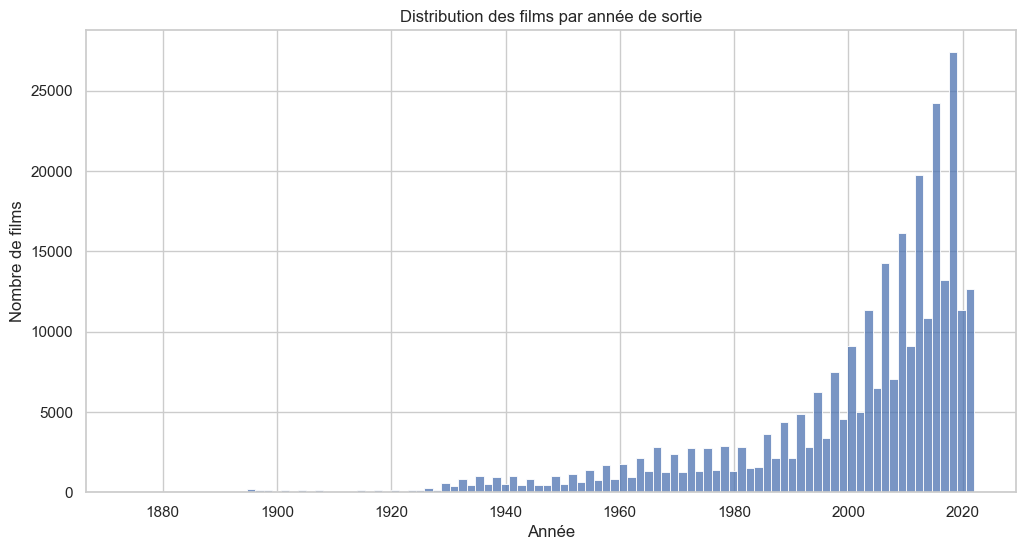

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams.update({"figure.figsize": (12, 6)})

plt.figure()
sns.histplot(data = movies["('startYear',)"].dropna(), bins=100, kde=False)
plt.title("Distribution des films par année de sortie")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.show()

#### Top 10 des genres les plus fréquents

In [21]:
top_10_genres = genres["('genre',)"].value_counts().head(10)
print("Top 10 des genres les plus fréquents :")
print(top_10_genres)

Top 10 des genres les plus fréquents :
('genre',)
Drama        138499
Comedy       100811
Action        55128
Crime         46429
Adventure     42797
Animation     34917
Romance       32335
Mystery       25319
Thriller      22224
Family        20703
Name: count, dtype: int64


#### Distribution des notes (ratings)

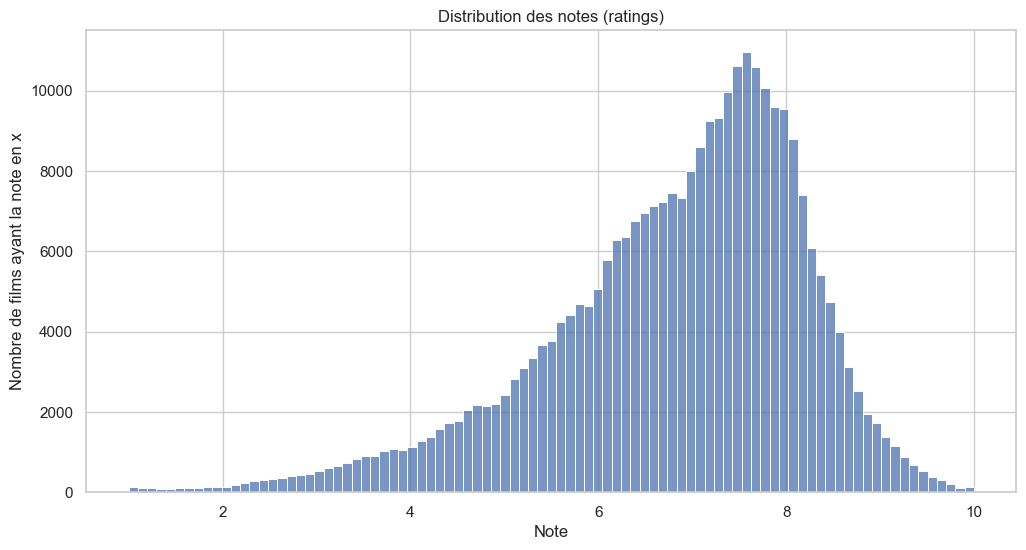

In [22]:
plt.figure()
sns.histplot(data=ratings["('averageRating',)"].dropna(), bins=ratings["('averageRating',)"].nunique(), kde=False)
plt.title("Distribution des notes (ratings)")
plt.xlabel("Note")
plt.ylabel("Nombre de films ayant la note en x")
plt.show()

#### Nombre moyen d'acteurs par film

In [23]:
nombre_acteurs_par_film = characters.groupby("('mid',)").size()

print("Nombre acteurs par film : ")
print(nombre_acteurs_par_film)

moyenne = nombre_acteurs_par_film.mean()
print(f"Nombre moyen d'acteurs par film : {moyenne}")


Nombre acteurs par film : 
('mid',)
tt0000001    1
tt0000005    2
tt0000008    1
tt0000009    3
tt0000011    1
            ..
tt9916204    4
tt9916270    4
tt9916362    4
tt9916380    4
tt9916720    2
Length: 282474, dtype: int64
Nombre moyen d'acteurs par film : 4.974879103917528


### Relation entre tables

#### Vérification des clés étrangères

Vérification qu'il n'y pas de mid dans une des tables qui n'est pas présent dans la table movies (orphelins)

In [24]:
mids_movies = set(movies["('mid',)"])

mid_characters_non_movies = characters[~characters["('mid',)"].isin(mids_movies)]
mid_directors_non_movies = directors[~directors["('mid',)"].isin(mids_movies)]
mid_genres_non_movies = genres[~genres["('mid',)"].isin(mids_movies)]
mid_knownformovies_non_movies = knownformovies[~knownformovies["('mid',)"].isin(mids_movies)]
mid_principals_non_movies = principals[~principals["('mid',)"].isin(mids_movies)]
mid_ratings_non_movies = ratings[~ratings["('mid',)"].isin(mids_movies)]
mid_titles_non_movies = titles[~titles["('mid',)"].isin(mids_movies)]
mid_writers_non_movies = writers[~writers["('mid',)"].isin(mids_movies)]

mid_non_movies = {
    "characters_non_movies": mid_characters_non_movies,
    "directors_non_movies": mid_directors_non_movies,
    "genres_non_movies": mid_genres_non_movies,
    "knownformovies_non_movies": mid_knownformovies_non_movies,
    "principals_non_movies": mid_principals_non_movies,
    "ratings_non_movies": mid_ratings_non_movies,
    "titles_non_movies": mid_titles_non_movies,
    "writers_non_movies": mid_writers_non_movies
}

for f in mid_non_movies :
    if mid_non_movies[f].shape[0] == 0:
        print(f"{f} : pas d'orphelins")
    else :
        print(f"{f} : {mid_non_movies[f].shape[0]} orphelins")


characters_non_movies : pas d'orphelins
directors_non_movies : pas d'orphelins
genres_non_movies : pas d'orphelins
knownformovies_non_movies : pas d'orphelins
principals_non_movies : pas d'orphelins
ratings_non_movies : pas d'orphelins
titles_non_movies : pas d'orphelins
writers_non_movies : pas d'orphelins


Vérification que tous les mid de la table movies sont présents dans toutes autres tables qui ont une colonne mid

In [25]:
tables_a_verifier = {
    "characters": characters,
    "directors": directors,
    "genres": genres,
    "ratings": ratings,
    "titles": titles,
    "writers": writers,
    "knownformovies": knownformovies,
    "principals": principals
}

for table in tables_a_verifier :
    mids_table = set(tables_a_verifier[table]["('mid',)"])
    mids_non_presents = mids_table - mids_movies

    if len(mids_non_presents) > 0 :
        print(f"La table {table} contient des mid non présents dans movies :")
        print(mids_non_presents)
    else :
        print(f"La table {table} a tous les mid présents dans movies.")

La table characters a tous les mid présents dans movies.
La table directors a tous les mid présents dans movies.
La table genres a tous les mid présents dans movies.
La table ratings a tous les mid présents dans movies.
La table titles a tous les mid présents dans movies.
La table writers a tous les mid présents dans movies.
La table knownformovies a tous les mid présents dans movies.
La table principals a tous les mid présents dans movies.


## Conception du schéma relationnel

### Schéma relationnel normalisé (3NF)

In [ ]:
print("Création des tables dans la base de données SQLite")

cur = con.cursor()

cur.execute("""
    CREATE TABLE IF NOT EXISTS movies(
        mid TEXT PRIMARY KEY,
        titleType TEXT,
        primaryTitle TEXT,
        originalTitle TEXT,
        isAdult BOOLEAN,
        startYear INTEGER,
        endYear INTEGER,
        runtimeMinutes INTEGER
    )
"""
)

cur.execute("""
    CREATE TABLE IF NOT EXISTS persons(
        pid TEXT PRIMARY KEY,
        primaryName TEXT,
        birthYear INTEGER,
        deathYear INTEGER
    )
"""
)

cur.execute("""
    CREATE TABLE IF NOT EXISTS characters(
        mid TEXT,
        pid TEXT,
        name TEXT,
        PRIMARY KEY (mid, pid, name),
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE, 
        FOREIGN KEY (pid) REFERENCES persons(pid) ON DELETE CASCADE

    )
"""
)

cur.execute("""
    CREATE TABLE IF NOT EXISTS directors(
        mid TEXT,
        pid TEXT,
        PRIMARY KEY (mid, pid),
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE,
        FOREIGN KEY (pid) REFERENCES persons(pid) ON DELETE CASCADE
    )    
"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS genres(
        mid TEXT,
        genre TEXT,
        PRIMARY KEY (mid, genre),
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE
    )
"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS knownformovies(
        pid TEXT,
        mid TEXT,
        PRIMARY KEY (pid, mid),
        FOREIGN KEY (pid) REFERENCES persons(pid) ON DELETE CASCADE,
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE
    )"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS principals(
        mid TEXT,
        ordering INTEGER,
        pid TEXT,
        category TEXT,
        job TEXT,
        characters TEXT,
        PRIMARY KEY (mid, ordering, pid, category),
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE,
        FOREIGN KEY (pid) REFERENCES persons(pid) ON DELETE CASCADE
    )    
"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS professions(
        pid TEXT PRIMARY KEY,
        jobName TEXT,
        FOREIGN KEY (pid) REFERENCES persons(pid) ON DELETE CASCADE
    )
"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS ratings(
        mid TEXT PRIMARY KEY,
        averageRating REAL,
        numVotes INTEGER,
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE
    )
"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS titles(
        mid TEXT,
        ordering INTEGER,
        title TEXT,
        region TEXT,
        language TEXT,
        types TEXT,
        attributes TEXT,
        isOriginalTitle BOOLEAN,
        PRIMARY KEY (mid, ordering),
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE
    )
"""
)

cur.execute(
"""
    CREATE TABLE IF NOT EXISTS writers(
        mid TEXT,
        pid TEXT,
        PRIMARY KEY (mid, pid),
        FOREIGN KEY (mid) REFERENCES movies(mid) ON DELETE CASCADE,
        FOREIGN KEY (pid) REFERENCES persons(pid) ON DELETE CASCADE
    )    
"""
)

con.commit()

print("Tables créées")



Création des tables dans la base de données SQLite
Tables créées


In [9]:
import pandas as pd
import sqlite3

con = sqlite3.connect("imdb.db")

cur = con.cursor()

cur.execute("DROP TABLE IF EXISTS sqlite_sequence;")

con.commit()

OperationalError: table sqlite_sequence may not be dropped